## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
from tensorflow.python import keras

# Disable GPU
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
def train(momentum, use_nesterov):
    ## 超參數設定
    LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
    EPOCHS = 10
    BATCH_SIZE = 256
    results = {}
    """
    Build the experiment loop
    """
    for lr in LEARNING_RATE:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with LR = %.6f" % (lr))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.SGD(lr=lr, nesterov=use_nesterov, momentum=momentum)
        model.compile(loss="categorical_crossentropy", metrics=["acc"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "exp-lr-%s" % str(lr)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}
        
    import matplotlib.pyplot as plt
    %matplotlib inline
    """
    Draw the results
    """
    %matplotlib inline
    color_bar = ["r", "g", "b", "y", "m", "k"]

    plt.figure(figsize=(8,6))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
    plt.title("Loss")
    plt.legend()
    plt.show()

    plt.figure(figsize=(8,6))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
    plt.title("Accuracy")
    plt.legend()
    plt.show()
    plt.close('all')

Experiment with LR = 0.100000
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [=============

Epoch 1/10
50000/50000 [==============================] - 2s 38us/sample - loss: 2.2410 - acc: 0.1712 - val_loss: 2.1564 - val_acc: 0.2234
Epoch 2/10
50000/50000 [==============================] - 2s 35us/sample - loss: 2.1048 - acc: 0.2505 - val_loss: 2.0572 - val_acc: 0.2744
Epoch 3/10
50000/50000 [==============================] - 2s 34us/sample - loss: 2.0249 - acc: 0.2884 - val_loss: 1.9927 - val_acc: 0.3006
Epoch 4/10
50000/50000 [==============================] - 2s 35us/sample - loss: 1.9711 - acc: 0.3130 - val_loss: 1.9481 - val_acc: 0.3248
Epoch 5/10
50000/50000 [==============================] - 2s 35us/sample - loss: 1.9315 - acc: 0.3294 - val_loss: 1.9142 - val_acc: 0.3386
Epoch 6/10
50000/50000 [==============================] - 2s 35us/sample - loss: 1.9007 - acc: 0.3412 - val_loss: 1.8863 - val_acc: 0.3441
Epoch 7/10
50000/50000 [==============================] - 2s 35us/sample - loss: 1.8755 - acc: 0.3486 - val_loss: 1.8644 - val_acc: 0.3549
Epoch 8/10
50000/50000 [===

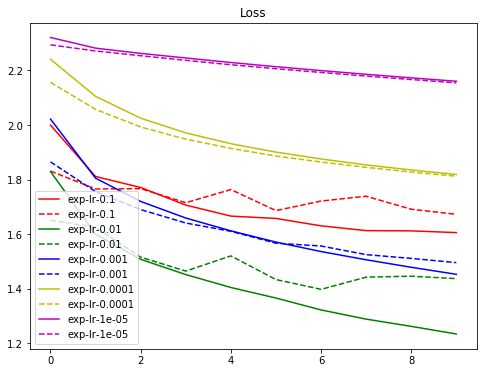

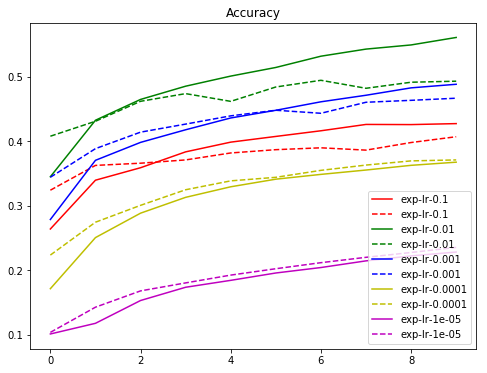

In [7]:
train(momentum=0.95, use_nesterov=True)

Experiment with LR = 0.100000
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [=============

Epoch 1/10
50000/50000 [==============================] - 2s 39us/sample - loss: 2.3357 - acc: 0.0658 - val_loss: 2.3147 - val_acc: 0.0790
Epoch 2/10
50000/50000 [==============================] - 2s 34us/sample - loss: 2.3011 - acc: 0.1025 - val_loss: 2.2877 - val_acc: 0.1205
Epoch 3/10
50000/50000 [==============================] - 2s 34us/sample - loss: 2.2771 - acc: 0.1386 - val_loss: 2.2659 - val_acc: 0.1513
Epoch 4/10
50000/50000 [==============================] - 2s 34us/sample - loss: 2.2570 - acc: 0.1629 - val_loss: 2.2475 - val_acc: 0.1742
Epoch 5/10
50000/50000 [==============================] - 2s 35us/sample - loss: 2.2399 - acc: 0.1837 - val_loss: 2.2313 - val_acc: 0.1885
Epoch 6/10
50000/50000 [==============================] - 2s 35us/sample - loss: 2.2243 - acc: 0.1942 - val_loss: 2.2162 - val_acc: 0.1994
Epoch 7/10
50000/50000 [==============================] - 2s 34us/sample - loss: 2.2096 - acc: 0.2025 - val_loss: 2.2019 - val_acc: 0.2105
Epoch 8/10
50000/50000 [===

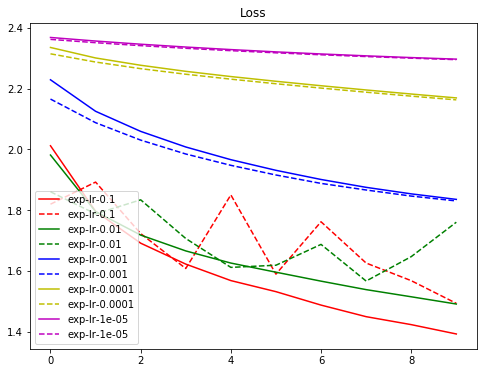

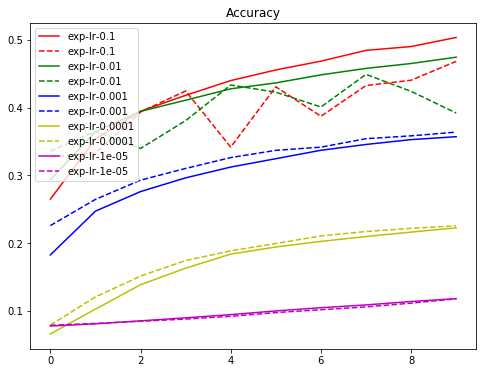

In [8]:
train(momentum=0.5, use_nesterov=False)